# EDA (Edatory Data Analysis)

### El análisis exploratorio de datos se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones con la ayuda de estadísticas resumidas y representaciones gráficas.

Ya estamos casi listos para empezar a analizar los datos. Primero vamos a convertir algunas columnas a números enteros.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(color_codes=True)
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
import folium
import ee
import geemap.foliumap as geemap
color = sns.color_palette("tab10")

In [ ]:
df_ardilla = pd.read_csv('../ardillas/data/ardillas.csv')
df_ardilla.head(10)

In [9]:
df_ardilla[['running', 'chasing','climbing', 'eating', 'foraging']] = df_ardilla[['running', 'chasing','climbing', 'eating', 'foraging']].astype(int)

In [10]:
df_ardilla[['kuks', 'quaas','moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent','runs_from']] = df_ardilla[['kuks', 'quaas',
       'moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent',
       'runs_from']].astype(int)

In [35]:
x = folium.Map(location=[40.794082, -73.956134], zoom_start=15)

for i in range(len(df_ardilla)):
    folium.CircleMarker(
    location=[df_ardilla.iloc[i,1],df_ardilla.iloc[i,0]],
    radius=3,
    color= 'Purple',    
    icon=folium.Icon(icon="cloud")).add_to(x)
    
x

Como se puede ver, prácticamente se vieron por todas partes salvo lógicamente los lagos. Si ampliamos el mapa, veremos que el resto de zonas sin avistamientos corresponden a campos de beisbol ó pistas de tenis.

# Edad de las ardillas

Veamos ahora en un gráfico cuantas ardillas avistadas eran adultas y cuántas jóvenes.

Figure 1: La mayoría de los avistamientos las ardillas eran adultas.


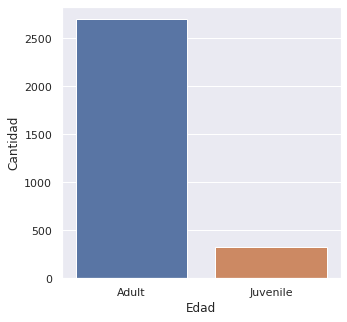

In [48]:
fig,ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df_ardilla, x= 'age')
print('Figure 1: La mayoría de los avistamientos las ardillas eran adultas.')
ax.set_xlabel("Edad")
ax.set_ylabel("Cantidad")
plt.show()


# Colores de las ardillas

¿De qué colores eran las ardillas que se vieron?

Figure 2: La mayoría de las ardillas eran Grises.


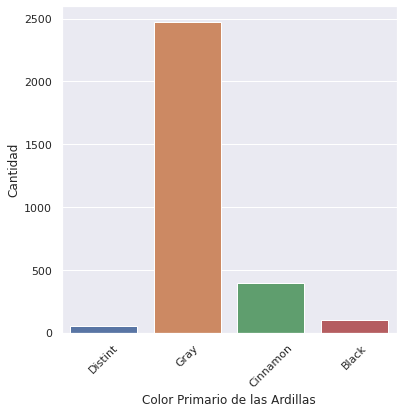

In [52]:
fig,ax = plt.subplots(figsize=(6,6))
sns.countplot(data=df_ardilla, x= 'primary_fur_color')
ax.set_ylabel("Cantidad")
print('Figure 2: La mayoría de las ardillas eran Grises.')
ax.set_xlabel("Color Primario de las Ardillas")
plt.xticks(rotation = 45)
plt.show()


# ¿Dónde estaban las ardillas de cada color?

In [51]:
x= folium.Map(location=[40.781781, -73.966787], zoom_start=15)

color_map = {"Black":"black", "Cinnamon": "red", "Gray": "gray", "Distint": "purple"}

for i in range(len(df_ardilla)):
    folium.CircleMarker(
    location=[df_ardilla.iloc[i,1],df_ardilla.iloc[i,0]],
    radius=3,
    color = color_map[df_ardilla.loc[i,'primary_fur_color']],
    icon=folium.Icon(icon="cloud")).add_to(x)
  
x

# Colores "Highlight" 

Analicemos qué cantidad de ardillas tenian cada posible "Highlight color"

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
sns.countplot(data=df_ardilla, y= 'highlight_fur_color', order = df_ardilla['highlight_fur_color'].value_counts().index)
ax.set_title("Highlight colors")
ax.set_xlabel("Cantidad")
plt.xticks(rotation = 45)
plt.show()